In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Downloads/CustomerSegmentation/customer_segmentation.csv')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [36]:
df.shape

(2240, 29)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [39]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Displaying columns with missing values and the count of missing values
missing_values[missing_values > 0]

# Printing the missing column names and the count of missing values
for column_name, missing_count in missing_values.items():
    print(f"Column '{column_name}' has {missing_count} missing values.")

Column 'ID' has 0 missing values.
Column 'Year_Birth' has 0 missing values.
Column 'Education' has 0 missing values.
Column 'Marital_Status' has 0 missing values.
Column 'Income' has 24 missing values.
Column 'Kidhome' has 0 missing values.
Column 'Teenhome' has 0 missing values.
Column 'Dt_Customer' has 0 missing values.
Column 'Recency' has 0 missing values.
Column 'MntWines' has 0 missing values.
Column 'MntFruits' has 0 missing values.
Column 'MntMeatProducts' has 0 missing values.
Column 'MntFishProducts' has 0 missing values.
Column 'MntSweetProducts' has 0 missing values.
Column 'MntGoldProds' has 0 missing values.
Column 'NumDealsPurchases' has 0 missing values.
Column 'NumWebPurchases' has 0 missing values.
Column 'NumCatalogPurchases' has 0 missing values.
Column 'NumStorePurchases' has 0 missing values.
Column 'NumWebVisitsMonth' has 0 missing values.
Column 'AcceptedCmp3' has 0 missing values.
Column 'AcceptedCmp4' has 0 missing values.
Column 'AcceptedCmp5' has 0 missing v

In [40]:
# Removing rows with missing values in the 'Income' column
df = df.dropna(subset=['Income'])

# Checking the shape of the dataframe after removing rows with missing values
df.shape


(2216, 29)

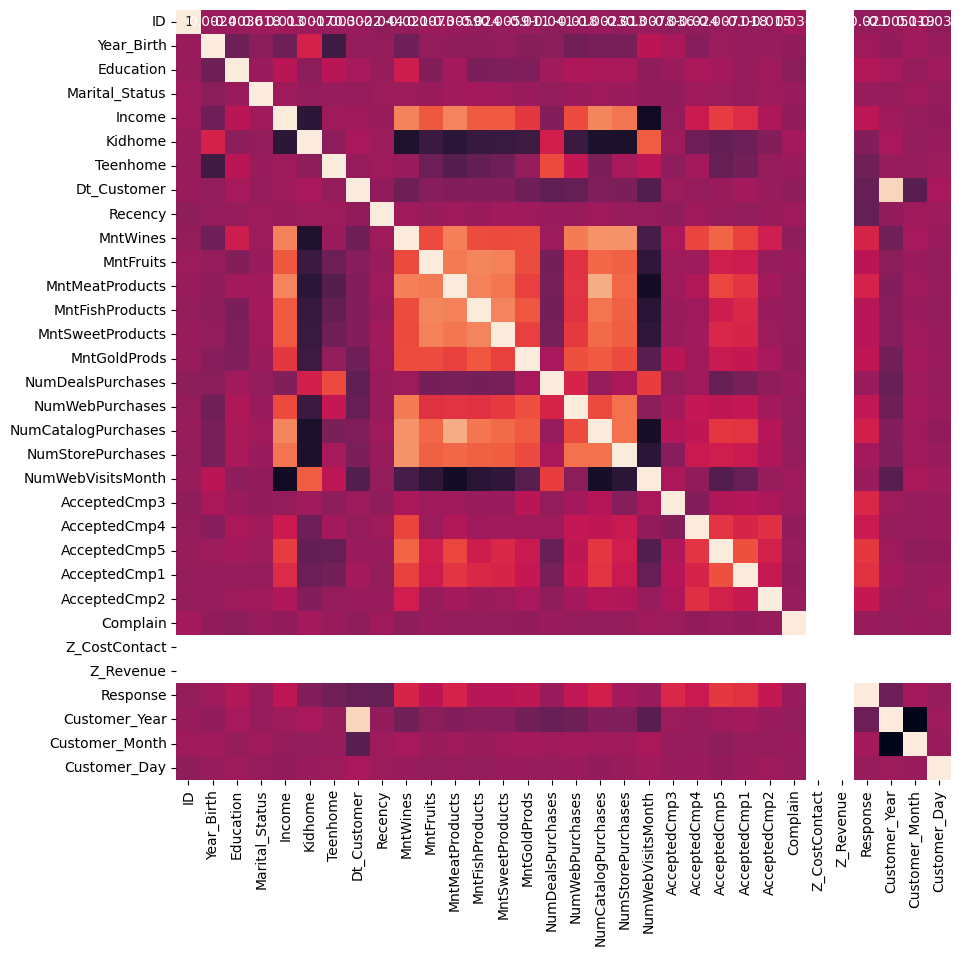

In [44]:
# Ensure 'Dt_Customer' is in datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Now we can safely extract year, month, and day
df['Customer_Year'] = df['Dt_Customer'].dt.year
df['Customer_Month'] = df['Dt_Customer'].dt.month
df['Customer_Day'] = df['Dt_Customer'].dt.day

# Now dropping the original 'Dt_Customer' column as we have extracted the necessary information
df_cluster = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])


plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

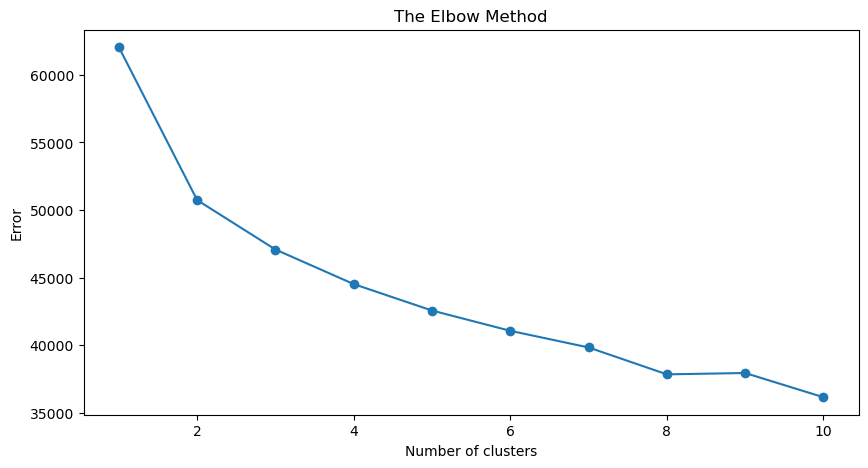

In [45]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Elbow Method to find the optimal number of clusters
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    errors.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), errors, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()



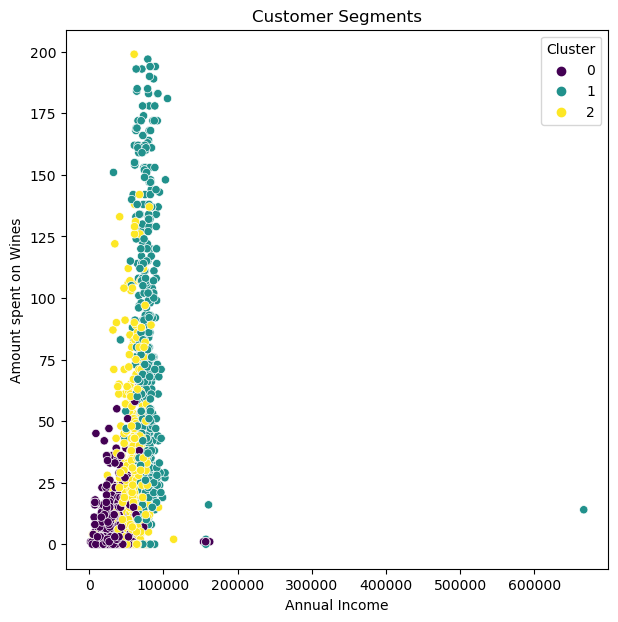

In [46]:
# Applying KMeans to the dataset with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Adding cluster information to the dataframe
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(7, 7))
sb.scatterplot(data=df, x='Income', y='MntFruits', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Amount spent on Wines')
plt.show()

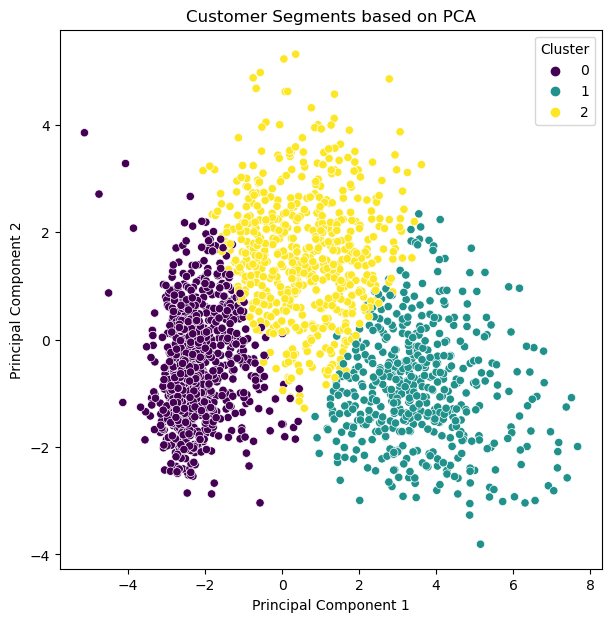

In [47]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results and the cluster assignments
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualizing the clusters based on the PCA components
plt.figure(figsize=(7, 7))
sb.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()